<h1><center><font color = "red">Cleaning and Preprocessing</font></center></h1>

<h3><font color = "green">Load Necessary Libraries</font></h3>

In [2]:
%matplotlib inline
# other libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import os

# display all features
pd.set_option("display.max_columns", None)

# matplotlib settings
mpl.rc('axes', labelsize=15)
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)

# remove the top and right axis
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

warnings.filterwarnings(action="ignore")


In [3]:
DATASETS_file = "../data"
csv_file = "matches.csv"

csv_file_path = os.path.join(DATASETS_file, csv_file)
matches_df = pd.read_csv(filepath_or_buffer=csv_file_path)

print(f"accidents_df shape:\t{matches_df.shape}")
matches_df.head()

accidents_df shape:	(6077, 50)


,season,date,match_name,home_team,away_team,winner,home_score,away_score,h_odd,d_odd,a_odd,h_match_points,a_match_points,ht_rank,ht_ls_rank,ht_days_ls_match,ht_points,ht_l_points,ht_l_wavg_points,ht_goals,ht_l_goals,ht_l_wavg_goals,ht_goals_sf,ht_l_goals_sf,ht_l_wavg_goals_sf,ht_wins,ht_draws,ht_losses,ht_win_streak,ht_loss_streak,ht_draw_streak,at_rank,at_ls_rank,at_days_ls_match,at_points,at_l_points,at_l_wavg_points,at_goals,at_l_goals,at_l_wavg_goals,at_goals_sf,at_l_goals_sf,at_l_wavg_goals_sf,at_wins,at_draws,at_losses,at_win_streak,at_loss_streak,at_draw_streak,ls_winner
0,2020,2021-05-23,Arsenal - Brighton,Arsenal,Brighton,HOME_TEAM,2,0,1.68,4.22,4.96,3,0,8,8.0,4.0,58,3.000000,2.857877,53,17.666667,2.298375,39,17.333333,0.691471,17,7,13,4,0,0,16,15.0,5.0,41,1.333333,1.969897,40,13.333333,2.012386,44,13.333333,1.541537,9,14,14,1,0,0,AWAY_TEAM
1,2020,2021-05-23,Aston Villa - Chelsea,Aston Villa,Chelsea,HOME_TEAM,2,1,6.99,4.92,1.45,3,0,11,17.0,4.0,52,1.333333,1.741195,53,17.666667,1.674424,45,17.333333,1.528030,15,7,15,1,0,0,4,4.0,5.0,67,2.000000,2.202377,57,19.000000,1.448092,34,14.666667,0.902502,19,10,8,1,0,0,DRAW
2,2020,2021-05-23,Fulham - Newcastle,Fulham,Newcastle,AWAY_TEAM,0,2,2.49,3.48,2.91,0,3,18,NaN,5.0,28,0.333333,0.534964,27,9.000000,0.794198,51,14.666667,1.709559,5,13,19,0,0,1,12,13.0,4.0,42,2.000000,1.982292,44,14.666667,1.853031,62,17.000000,1.460800,11,9,17,1,0,0,DRAW
3,2020,2021-05-23,Leeds - West Brom,Leeds,West Brom,HOME_TEAM,3,1,1.55,4.78,5.59,3,0,9,NaN,5.0,56,3.000000,2.714298,59,19.666667,2.418451,53,18.000000,0.280725,17,5,15,3,0,0,19,NaN,4.0,26,0.000000,0.130809,34,11.333333,1.043309,73,19.333333,2.557325,5,11,21,0,3,0,AWAY_TEAM
4,2020,2021-05-23,Leicester - Tottenham,Leicester,Tottenham,AWAY_TEAM,2,4,1.80,4.26,4.14,0,3,5,5.0,5.0,66,1.000000,0.963042,66,22.000000,1.450428,46,20.000000,1.877408,20,6,11,0,1,0,7,6.0,4.0,59,1.000000,1.059254,64,21.333333,1.492041,43,16.333333,1.471424,17,8,12,0,1,0,AWAY_TEAM


<h2><font color = "green">General Informations</font></h2>

In [4]:
# Check data info
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6077 entries, 0 to 6076
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   season              6077 non-null   int64  
 1   date                6077 non-null   object 
 2   match_name          6077 non-null   object 
 3   home_team           6077 non-null   object 
 4   away_team           6077 non-null   object 
 5   winner              6077 non-null   object 
 6   home_score          6077 non-null   int64  
 7   away_score          6077 non-null   int64  
 8   h_odd               6077 non-null   float64
 9   d_odd               6077 non-null   float64
 10  a_odd               6077 non-null   float64
 11  h_match_points      6077 non-null   int64  
 12  a_match_points      6077 non-null   int64  
 13  ht_rank             6077 non-null   int64  
 14  ht_ls_rank          4842 non-null   float64
 15  ht_days_ls_match    5917 non-null   float64
 16  ht_poi

In [5]:
# Check statistics
matches_df.describe()

,season,home_score,away_score,h_odd,d_odd,a_odd,h_match_points,a_match_points,ht_rank,ht_ls_rank,ht_days_ls_match,ht_points,ht_l_points,ht_l_wavg_points,ht_goals,ht_l_goals,ht_l_wavg_goals,ht_goals_sf,ht_l_goals_sf,ht_l_wavg_goals_sf,ht_wins,ht_draws,ht_losses,ht_win_streak,ht_loss_streak,ht_draw_streak,at_rank,at_ls_rank,at_days_ls_match,at_points,at_l_points,at_l_wavg_points,at_goals,at_l_goals,at_l_wavg_goals,at_goals_sf,at_l_goals_sf,at_l_wavg_goals_sf,at_wins,at_draws,at_losses,at_win_streak,at_loss_streak,at_draw_streak
count,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,4842.000000,5917.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,4842.000000,5917.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000
mean,2012.503209,1.526247,1.159783,2.808452,3.972049,4.828134,1.624979,1.130821,10.501563,9.002272,7.485888,25.311338,1.264659,1.269834,24.724206,8.241402,1.251949,24.896495,7.229719,1.355695,6.895014,4.626296,6.972684,0.609018,0.703801,0.314629,10.501070,9.001446,7.518168,25.553892,1.345072,1.412385,24.870331,8.290110,1.352021,24.673359,7.218748,1.247875,6.976304,4.624979,6.886457,0.765674,0.549120,0.308376
std,4.609026,1.308117,1.151026,2.083920,1.266399,4.099824,1.321465,1.274981,5.766113,4.898705,5.214825,18.263564,0.833147,0.851410,17.580791,5.860264,0.795237,16.688841,4.560093,0.815078,5.492994,3.328867,5.349864,1.324494,1.120081,0.637643,5.765428,4.899296,5.240131,18.277637,0.846089,0.869562,17.545548,5.848516,0.836723,16.599990,4.532208,0.758928,5.495773,3.335979,5.345681,1.370497,1.044799,0.630070
min,2005.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2009.000000,1.000000,0.000000,1.650000,3.280000,2.380000,0.000000,0.000000,6.000000,5.000000,5.000000,11.000000,0.666667,0.578732,11.000000,3.666667,0.678248,11.000000,3.333333,0.766716,3.000000,2.000000,3.000000,0.000000,0.000000,0.000000,6.000000,5.000000,5.000000,11.000000,0.666667,0.692042,11.000000,3.666667,0.750000,11.000000,3.333333,0.701376,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000
50%,2013.000000,1.000000,1.000000,2.170000,3.510000,3.450000,1.000000,1.000000,11.000000,9.000000,7.000000,23.000000,1.333333,1.125000,23.000000,7.666667,1.129249,23.000000,7.000000,1.270677,6.000000,4.000000,6.000000,0.000000,0.000000,0.000000,11.000000,9.000000,7.000000,23.000000,1.333333,1.429688,23.000000,7.666667,1.241272,23.000000,7.000000,1.157227,6.000000,4.000000,6.000000,0.000000,0.000000,0.000000
75%,2017.000000,2.000000,2.000000,3.040000,4.180000,5.500000,3.000000,3.000000,15.000000,13.000000,8.000000,36.000000,2.000000,1.898675,35.000000,11.666667,1.726562,37.000000,10.666667,1.868366,10.000000,7.000000,11.000000,1.000000,1.000000,0.000000,15.000000,13.000000,8.000000,37.000000,2.000000,2.075988,36.000000,12.000000,1.853516,36.000000,10.666667,1.718750,10.000000,7.000000,10.000000,1.000000,1.000000,0.000000
max,2020.000000,9.000000,9.000000,37.950000,19.780000,41.780000,3.000000,3.000000,20.000000,17.000000,106.000000,94.000000,3.000000,3.000000,102.000000,34.000000,6.000000,85.000000,21.666667,6.000000,30.000000,16.000000,29.000000,17.000000,11.000000,7.000000,20.000000,17.000000,107.000000,97.000000,3.000000,3.000000,105.000000,35.000000,6.000000,82.000000,20.666667,6.000000,31.000000,17.000000,28.000000,18.000000,10.000000,5.000000


In [6]:
# Information summary dataframe
summary_info_df = pd.DataFrame(data={
                                    "Features": matches_df.columns,
                                    "Dtype": matches_df.dtypes,
                                    "Cardinality": matches_df.nunique(),
                                    "Missing Values": matches_df.isna().sum(),
                                    "Percentage": (matches_df.isna().sum() / matches_df.shape[0]) * 100}).sort_values(by="Percentage",
                                                                                                                      ascending=False).reset_index().drop(labels=["index"],
                                                                                                                                                          axis=1)
summary_info_df

,Features,Dtype,Cardinality,Missing Values,Percentage
0,at_ls_rank,float64,17,1235,20.322528
1,ht_ls_rank,float64,17,1235,20.322528
2,ls_winner,object,3,634,10.432779
3,at_days_ls_match,float64,28,160,2.632878
4,ht_days_ls_match,float64,29,160,2.632878
5,ht_draws,int64,17,0,0.000000
6,ht_win_streak,int64,18,0,0.000000
7,ht_loss_streak,int64,11,0,0.000000
8,ht_draw_streak,int64,8,0,0.000000
9,at_rank,int64,20,0,0.000000


* We have some NaN values.
* Also we see some objects with high cardinality, like match name, home_team, away_team. We will drop those features too, because we can't use them as predictors (too many dummies).
* Also we will drop features that wouldn't be available before a match like, "home_score", "away_score", "h_match_points", and "a_match_points".
* Furthermore we will drop "date" and "Season" as irrelevant predictors for the outcome of a match score.

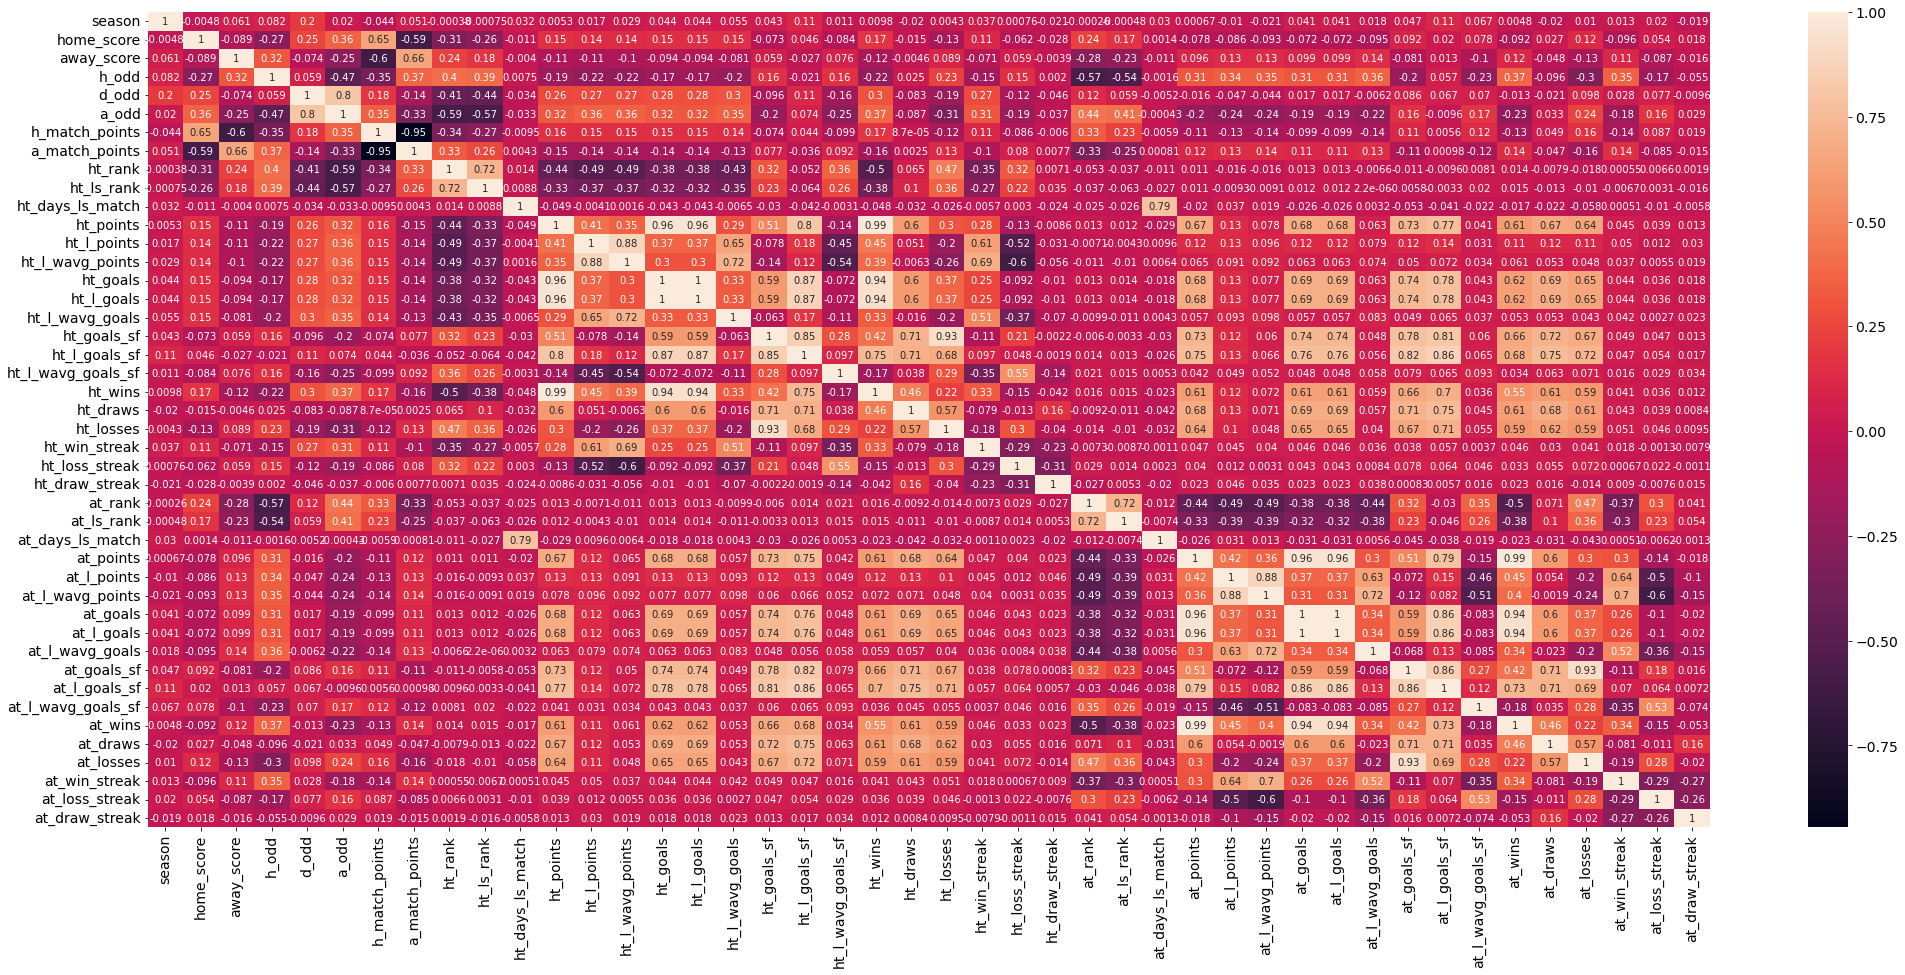

In [7]:
# Check for high correlated predictors
plt.figure(figsize=(35, 15))
sns.heatmap(matches_df.corr(), annot=True)
plt.show()

We can see that we have some high correlated features.

<h2><font color = "green">Data Cleaning and Preprocessing</font></h2> 

* Drop high correlated features.
* Drop NaN values.
* Drop "home_score", "away_score", "h_match_points", and "a_match_points", as those features wouldn't be available before a match.
* Drop "match_name", "home_team", and "away_team" features because they have high cardinality and also they are somewhat irrelevant for our predictions.
* Drop "date" and "Season" as irrelevant predictors for the outcome of a match score.
* Transform odds to real percentages.
* Transform date object to pd_datetime.

In [8]:
# Drop high correlated features
def uncorelated_features(dataset, threshold):
    """
    Returns a subset of df collumns with Pearson Correlations
    below threshold. 
    """
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                print(f"Dropping '{colname}'")
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
    return dataset

In [9]:
matches_df = uncorelated_features(dataset=matches_df, threshold=0.81)
matches_df.shape

Dropping 'ht_l_wavg_points'
Dropping 'ht_goals'
Dropping 'ht_l_goals'
Dropping 'ht_l_goals_sf'
Dropping 'ht_wins'
Dropping 'ht_losses'
Dropping 'at_l_wavg_points'
Dropping 'at_goals'
Dropping 'at_l_goals'
Dropping 'at_l_goals_sf'
Dropping 'at_l_goals_sf'
Dropping 'at_wins'
Dropping 'at_losses'


(6077, 38)

We will fill columns with NaN values with some arbitary negative number like -42 to make easier for our models to interpret them. In this way, models can understand that there's a reason for these values to be NaN. For example, in the “_rank” column, if a team doesn’t have a last rank it’s either because the match belongs to the first season present in the dataset or because this specific team wasn’t in the Premier League in the previous season.

In [10]:
# Drop NaN values
matches_df.fillna(value=-42, axis=0, inplace=True)

In [11]:
# Drop "home_score", "away_score", "h_match_points", and "a_match_points"
matches_df.drop(labels=["home_score", "away_score", "h_match_points", "a_match_points"], axis=1, inplace=True)

# Drop "match_name", "home_team", and "away_team" as features with high cardinality and also irrelevant
matches_df.drop(labels=["match_name", "home_team", "away_team"], axis=1, inplace=True)

# Drop "date" and "Season" as irrelevant predictors for the outcome of a match 
matches_df.drop(labels=["date", "season"], axis=1, inplace=True) 

matches_df.shape

(6077, 29)

In [12]:
matches_df.to_csv("matches_cleaned.csv", index=False)